In [1]:
import numpy as np 

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
import numpy as np
import matplotlib.pyplot as plt

torch.manual_seed(0)
np.random.seed(0)

transform = transforms.Compose([
    transforms.ToTensor(),
])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

def colored_mnist(dataset):
    colored_data = []
    colored_labels = []
    colors = [
        [1, 0, 0],
        [0, 1, 0],
        [0, 0, 1],
        [1, 1, 0],
        [1, 0, 1],
        [0, 1, 1],
        [0.5, 0.5, 0],
        [0.5, 0, 0.5],
        [0, 0.5, 0.5],
        [0.5, 0.5, 0.5]
    ]
    
    for img, label in dataset:
        img = img.squeeze(0)
        colored_img = torch.stack([img * colors[label][0],
                                   img * colors[label][1],
                                   img * colors[label][2]], dim=0)
        colored_data.append(colored_img)
        colored_labels.append(label)
        
    return torch.stack(colored_data), torch.tensor(colored_labels)

train_data, train_labels = colored_mnist(train_dataset)
test_data, test_labels = colored_mnist(test_dataset)

print(f"Train data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")


Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9912422/9912422 [00:00<00:00, 17661444.40it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28881/28881 [00:00<00:00, 472732.04it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1648877/1648877 [00:00<00:00, 3817583.02it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4542/4542 [00:00<00:00, 3100672.00it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Train data shape: torch.Size([60000, 3, 28, 28])
Test data shape: torch.Size([10000, 3, 28, 28])


In [ ]:
import torch
import zipfile
import os

train_data_file = 'train_data.pt'
train_labels_file = 'train_labels.pt'
test_data_file = 'test_data.pt'
test_labels_file = 'test_labels.pt'
zip_filename = 'colored_mnist.zip'

zip_path = '/kaggle/working/' + zip_filename

if not os.path.exists(zip_path):
    raise FileNotFoundError(f"{zip_filename} not found in /kaggle/working/. Please ensure the ZIP file is uploaded.")

with zipfile.ZipFile(zip_path, 'r') as zipf:
    zipf.extractall('/kaggle/working/')

print(f"Extracted {zip_filename}.")

train_data = torch.load(os.path.join('/kaggle/working/', train_data_file))
train_labels = torch.load(os.path.join('/kaggle/working/', train_labels_file))
test_data = torch.load(os.path.join('/kaggle/working/', test_data_file))
test_labels = torch.load(os.path.join('/kaggle/working/', test_labels_file))

print("Loaded train and test datasets from the ZIP file.")

os.remove(os.path.join('/kaggle/working/', train_data_file))
os.remove(os.path.join('/kaggle/working/', train_labels_file))
os.remove(os.path.join('/kaggle/working/', test_data_file))
os.remove(os.path.join('/kaggle/working/', test_labels_file))

print("Individual .pt files removed after loading.")


Extracted colored_mnist.zip.


/tmp/ipykernel_29/2492188801.py:26: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  train_data = torch.load(os.path.join('/kaggle/working/', train_data_file))


Loaded train and test datasets from the ZIP file.
Individual .pt files removed after loading.


/tmp/ipykernel_29/2492188801.py:27: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  train_labels = torch.load(os.path.join('/kaggle/working/', train_labels_file))
/tmp/ipykern

In [5]:
print(f"Train data shape: {train_data.shape}")
print(f"Train labels shape: {train_labels.shape}")
print(f"Test data shape: {test_data.shape}")
print(f"Test labels shape: {test_labels.shape}")


Train data shape: torch.Size([60000, 3, 28, 28])
Train labels shape: torch.Size([60000])
Test data shape: torch.Size([10000, 3, 28, 28])
Test labels shape: torch.Size([10000])


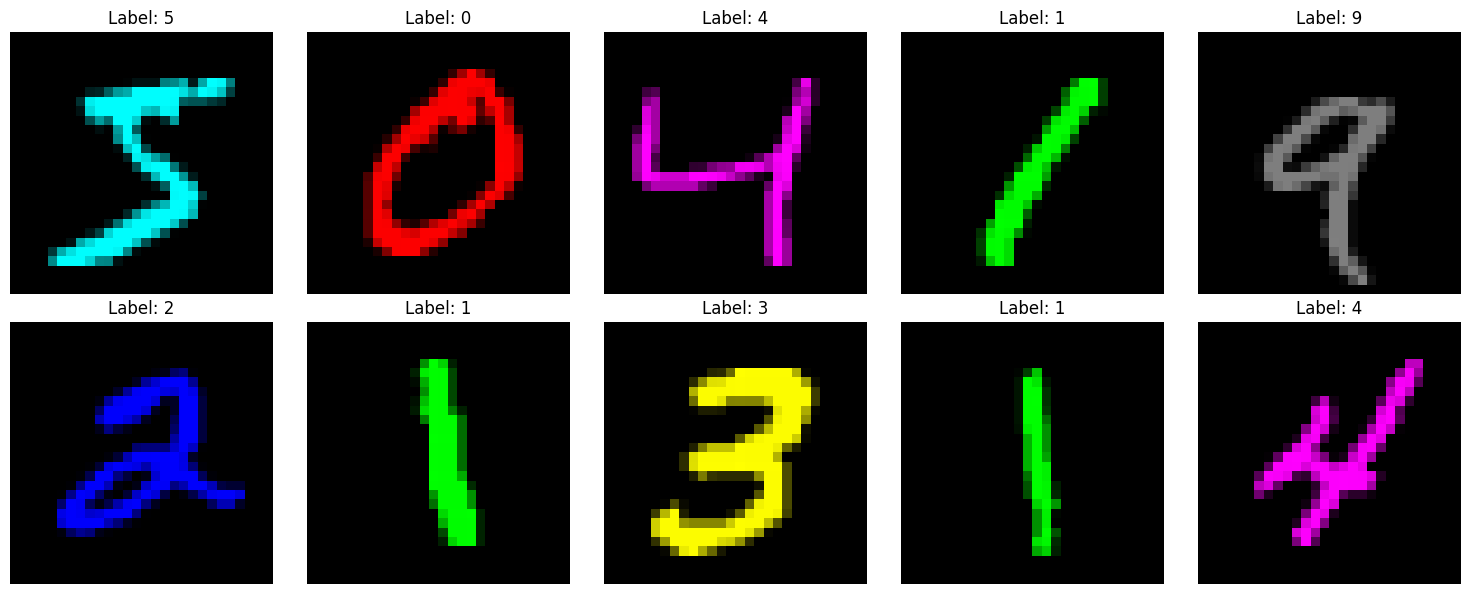

In [ ]:

fig, axs = plt.subplots(2, 5, figsize=(15, 6))

for i, ax in enumerate(axs.flat):

    ax.imshow(train_data[i].permute(1, 2, 0).numpy())

    ax.set_title(f"Label: {train_labels[i].item()}")

    ax.axis('off')

plt.tight_layout()

plt.show()


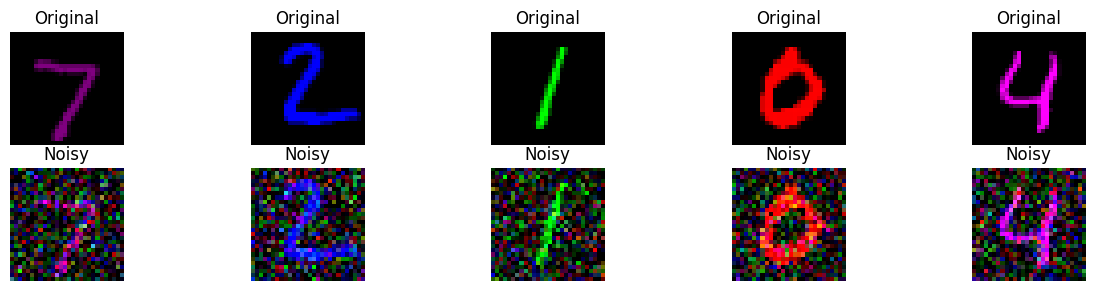

In [ ]:
def add_gaussian_noise(images, sigma=0.5):
    noise = torch.randn_like(images) * sigma
    noisy_images = images + noise
    noisy_images = torch.clamp(noisy_images, 0., 1.)
    return noisy_images

sigma = 0.3
train_noisy = add_gaussian_noise(train_data, sigma)
test_noisy = add_gaussian_noise(test_data, sigma)

def show_images(original, noisy, denoised=None, num=5):
    plt.figure(figsize=(15, 5))
    for i in range(num):
        ax = plt.subplot(3, num, i + 1)
        plt.imshow(original[i].permute(1, 2, 0).numpy())
        plt.title("Original")
        plt.axis('off')

        ax = plt.subplot(3, num, i + 1 + num)
        plt.imshow(noisy[i].permute(1, 2, 0).numpy())
        plt.title("Noisy")
        plt.axis('off')

        if denoised is not None:
            ax = plt.subplot(3, num, i + 1 + 2*num)
            plt.imshow(denoised[i].permute(1, 2, 0).detach().cpu().numpy())
            plt.title("Denoised")
            plt.axis('off')
    plt.show()

show_images(test_data, test_noisy)


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        
        # Encoder
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 128, kernel_size=3, stride=2, padding=1),  # [128,14,14]
            nn.BatchNorm2d(128),  # Add batch normalization
            nn.ReLU(True),
            nn.Dropout(0.2),  # Add Dropout with 20% probability
            
            nn.Conv2d(128, 64, kernel_size=3, stride=2, padding=1), # [64,7,7]
            nn.BatchNorm2d(64),  # Add batch normalization
            nn.ReLU(True),
            nn.Dropout(0.2),  # Add Dropout with 20% probability
            
            nn.Conv2d(64, 32, kernel_size=3, stride=2, padding=1),  # [32,4,4]
            nn.BatchNorm2d(32),  # Add batch normalization
            nn.ReLU(True),
            nn.Dropout(0.2),  # Add Dropout with 20% probability
            
            nn.Conv2d(32, 16, kernel_size=3, stride=2, padding=1),  # [16,2,2]
            nn.BatchNorm2d(16),  # Add batch normalization
            nn.ReLU(True),
            nn.Dropout(0.2)  # Add Dropout with 20% probability
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(16, 32, kernel_size=3, stride=2, padding=1, output_padding=1),  # [32,4,4]
            nn.BatchNorm2d(32),  # Add batch normalization
            nn.ReLU(True),
            nn.Dropout(0.2),  # Add Dropout with 20% probability
            
            nn.ConvTranspose2d(32, 64, kernel_size=3, stride=2, padding=1, output_padding=1),  # [64,8,8]
            nn.BatchNorm2d(64),  # Add batch normalization
            nn.ReLU(True),
            nn.Dropout(0.2),  # Add Dropout with 20% probability
            
            nn.ConvTranspose2d(64, 128, kernel_size=3, stride=2, padding=1, output_padding=1), # [128,16,16]
            nn.BatchNorm2d(128),  # Add batch normalization
            nn.ReLU(True),
            nn.Dropout(0.2),  # Add Dropout with 20% probability
            
            nn.ConvTranspose2d(128, 3, kernel_size=3, stride=2, padding=1, output_padding=1),  # [3,32,32]
            nn.Sigmoid()  # To ensure output is between 0 and 1
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        x = F.interpolate(x, size=(28, 28), mode='bilinear', align_corners=False)
        return x

# Instantiate the model
model = Autoencoder()

print(model)


Autoencoder(
  (encoder): Sequential(
    (0): Conv2d(3, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Dropout(p=0.2, inplace=False)
    (4): Conv2d(128, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): Dropout(p=0.2, inplace=False)
    (8): Conv2d(64, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (9): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU(inplace=True)
    (11): Dropout(p=0.2, inplace=False)
    (12): Conv2d(32, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (13): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): ReLU(inplace=True)
    (15): Dropout(p=0.2, inplace=False)
  )
  (decoder): Sequential(
 

In [ ]:
import matplotlib.pyplot as plt

def show_noisy_vs_denoised(noisy, denoised, num=5, epoch=5):
    plt.figure(figsize=(10, 5))
    plt.suptitle(f"Visualizing for Epoch {epoch}:", fontsize=16)
    
    for i in range(num):
        ax = plt.subplot(2, num, i + 1)
        plt.imshow(noisy[i].permute(1, 2, 0).cpu().numpy())
        plt.title("Noisy")
        plt.axis('off')

        ax = plt.subplot(2, num, i + 1 + num)
        plt.imshow(denoised[i].permute(1, 2, 0).cpu().numpy())
        plt.title("Denoised")
        plt.axis('off')

    plt.show()

def show_noisy_vs_denoised_at_epoch(epoch, model, num=5):
    model.eval()
    idx = torch.randint(0, len(test_data), (num,))
    noisy_images = test_noisy[idx]

    with torch.no_grad():
        denoised_images = model(noisy_images)

    show_noisy_vs_denoised(noisy_images.cpu(), denoised_images.cpu(), num=num, epoch=epoch)


Using device: cuda
Epoch [1/20], Train Loss: 0.026369, Test Loss: 0.011868
Epoch [2/20], Train Loss: 0.015626, Test Loss: 0.009610


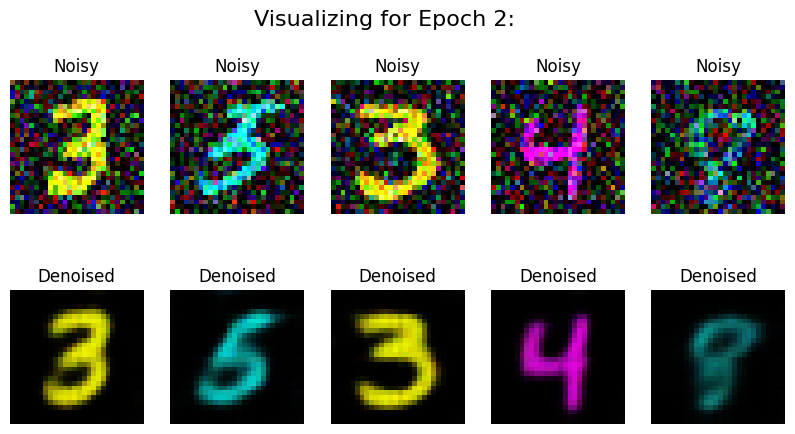

Epoch [3/20], Train Loss: 0.014342, Test Loss: 0.009036
Epoch [4/20], Train Loss: 0.013666, Test Loss: 0.008533


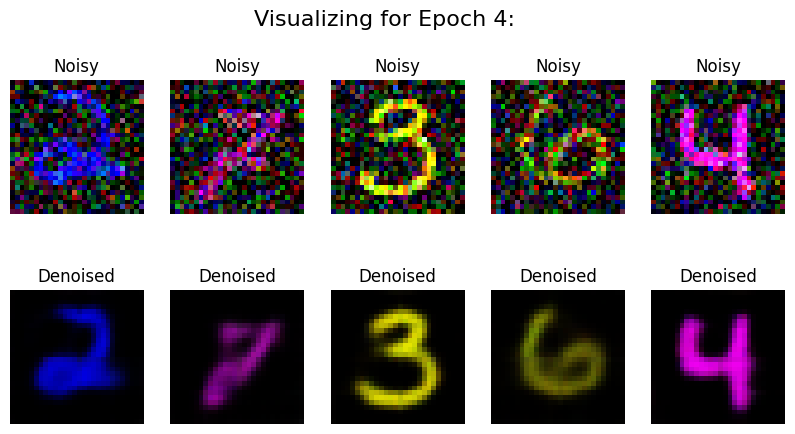

Epoch [5/20], Train Loss: 0.013270, Test Loss: 0.008566
Epoch [6/20], Train Loss: 0.012959, Test Loss: 0.008136


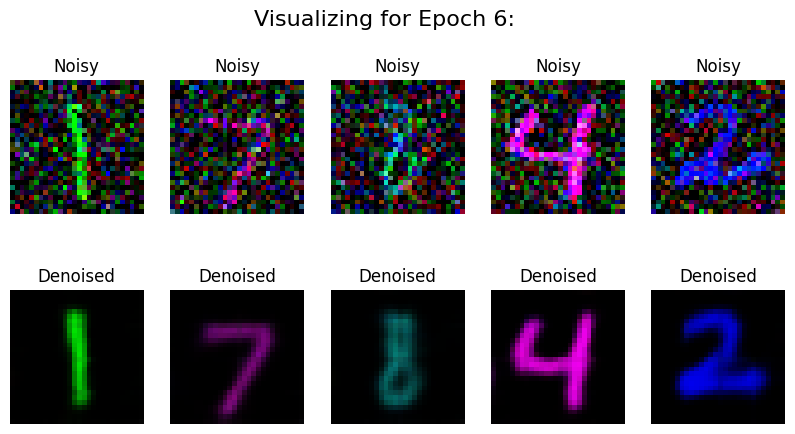

Epoch [7/20], Train Loss: 0.012795, Test Loss: 0.008328
Epoch [8/20], Train Loss: 0.012652, Test Loss: 0.008275


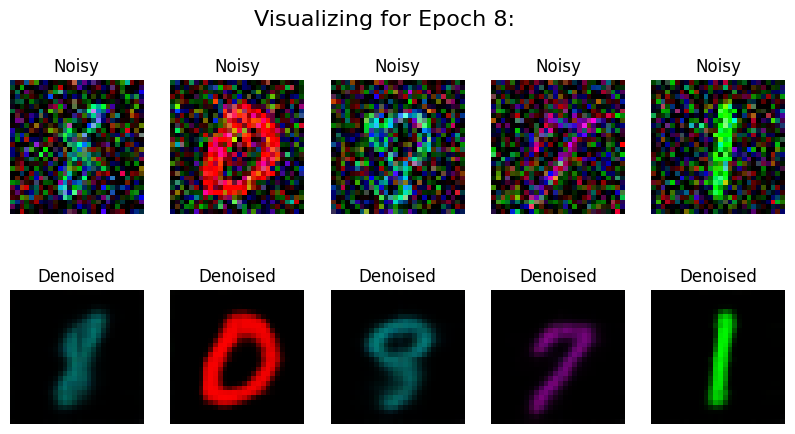

Epoch [9/20], Train Loss: 0.012548, Test Loss: 0.008090
Epoch [10/20], Train Loss: 0.012490, Test Loss: 0.008153


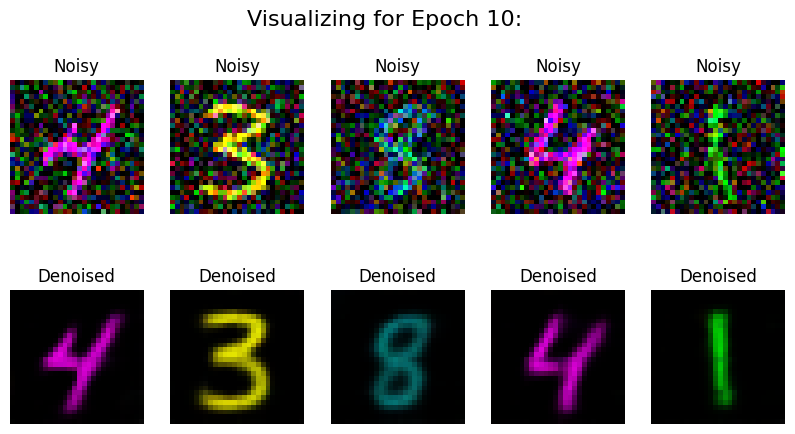

Epoch [11/20], Train Loss: 0.012425, Test Loss: 0.007976
Epoch [12/20], Train Loss: 0.012378, Test Loss: 0.008047


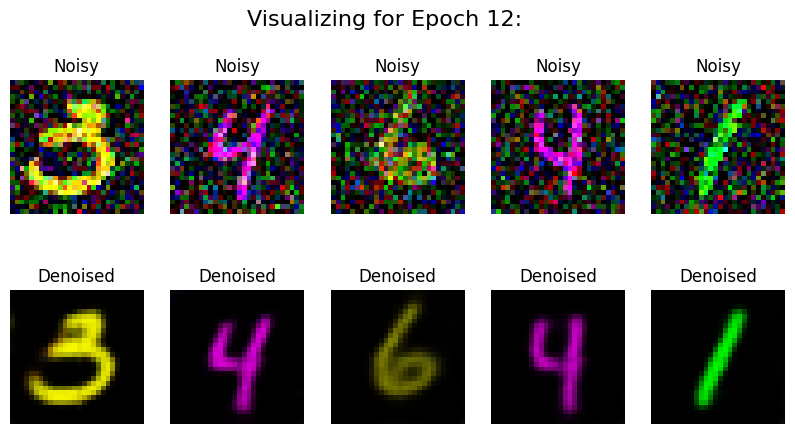

Epoch [13/20], Train Loss: 0.012335, Test Loss: 0.008062
Epoch [14/20], Train Loss: 0.012314, Test Loss: 0.007856


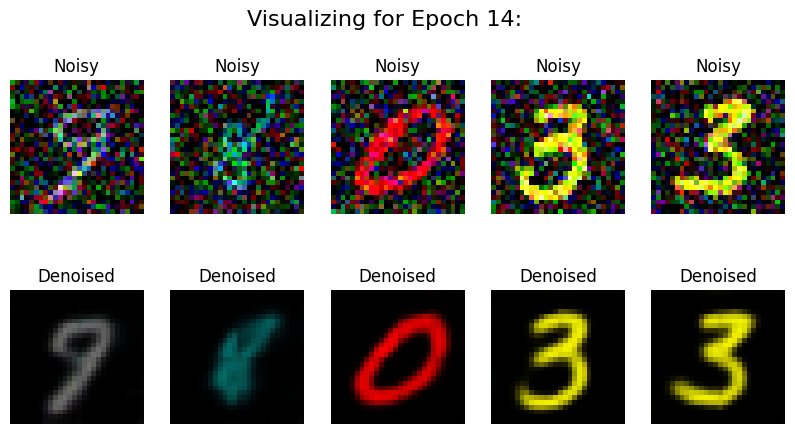

Epoch [15/20], Train Loss: 0.012263, Test Loss: 0.008041
Epoch [16/20], Train Loss: 0.012213, Test Loss: 0.008362


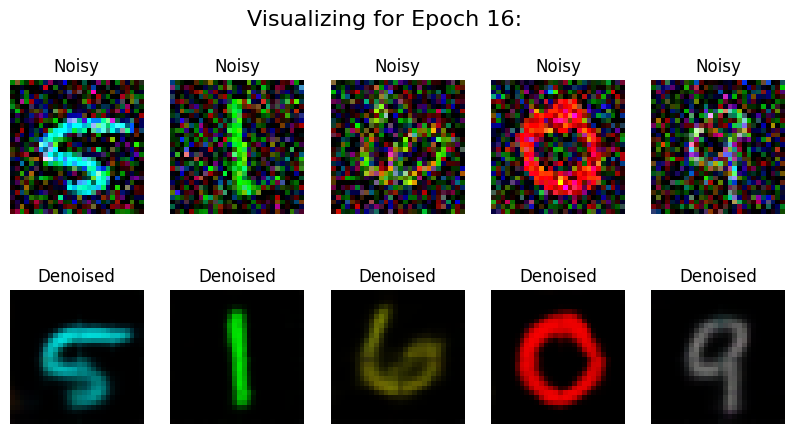

Epoch [17/20], Train Loss: 0.012153, Test Loss: 0.008342
Epoch [18/20], Train Loss: 0.012139, Test Loss: 0.007797


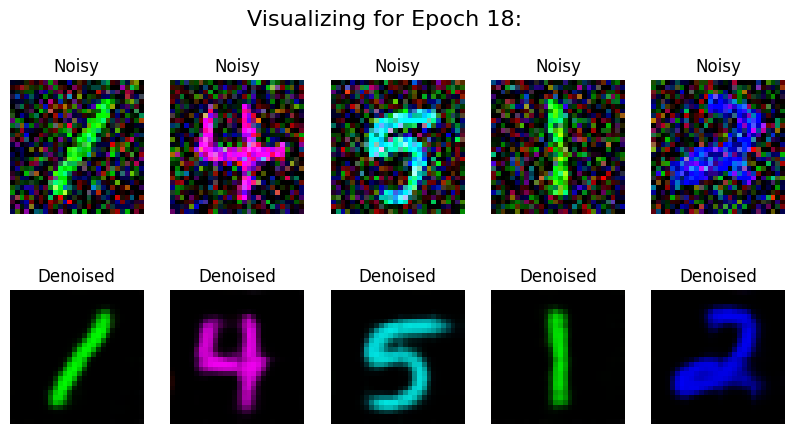

Epoch [19/20], Train Loss: 0.012146, Test Loss: 0.007871
Epoch [20/20], Train Loss: 0.012106, Test Loss: 0.008330


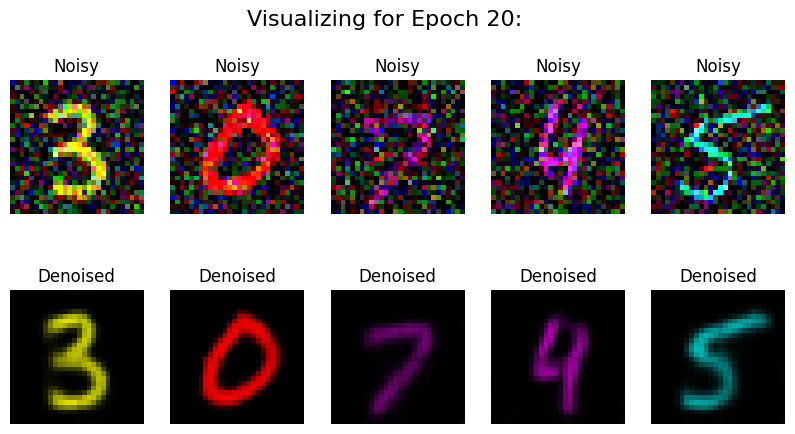

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

train_noisy = train_noisy.to(device)
train_data = train_data.to(device)
test_noisy = test_noisy.to(device)
test_data = test_data.to(device)

batch_size = 128
train_loader = DataLoader(torch.utils.data.TensorDataset(train_noisy, train_data), batch_size=batch_size, shuffle=True)
test_loader = DataLoader(torch.utils.data.TensorDataset(test_noisy, test_data), batch_size=batch_size, shuffle=False)

model = model.to(device)

criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)

num_epochs = 20
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for data in train_loader:
        inputs, targets = data
        inputs = inputs.to(device)
        targets = targets.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)
    train_losses.append(epoch_loss)

    model.eval()
    test_running_loss = 0.0
    with torch.no_grad():
        for data in test_loader:
            inputs, targets = data
            inputs = inputs.to(device)
            targets = targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            test_running_loss += loss.item() * inputs.size(0)

    test_epoch_loss = test_running_loss / len(test_loader.dataset)
    test_losses.append(test_epoch_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_loss:.6f}, Test Loss: {test_epoch_loss:.6f}")

    if (epoch + 1) % 2 == 0:
        show_noisy_vs_denoised_at_epoch(epoch + 1, model)


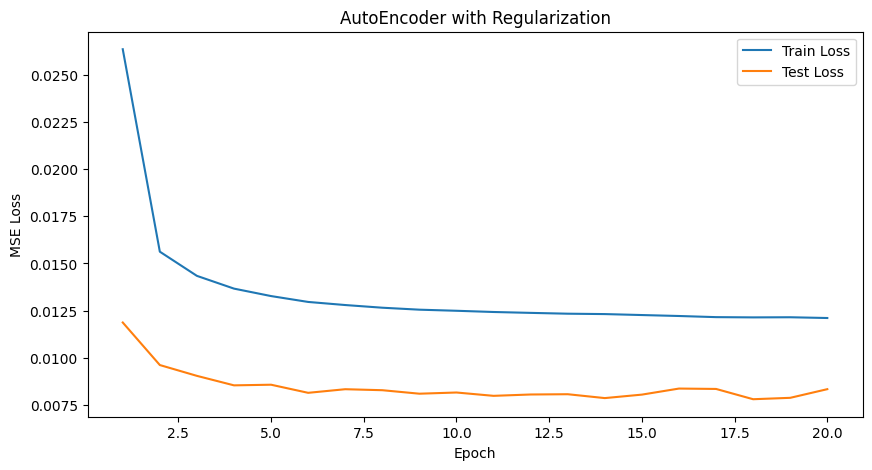

In [15]:
# Plot Loss Curves
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('AutoEncoder with Regularization')
plt.legend()
plt.show()

In [ ]:
def calculate_snr(original, denoised):
    original = original.view(original.size(0), -1)
    denoised = denoised.view(denoised.size(0), -1)
    noise = original - denoised
    signal_power = torch.mean(original ** 2, dim=1)
    noise_power = torch.mean(noise ** 2, dim=1)
    snr = 10 * torch.log10(signal_power / noise_power)
    return snr.mean().item()

model.eval()
total_snr = 0.0
total_mse = 0.0

with torch.no_grad():
    for data in test_loader:
        inputs, targets = data
        inputs = inputs.to(device)
        targets = targets.to(device)
        outputs = model(inputs)
        snr = calculate_snr(targets, outputs)
        total_snr += snr * inputs.size(0)
        mse = criterion(outputs, targets)
        total_mse += mse.item() * inputs.size(0)

avg_snr = total_snr / len(test_loader.dataset)
avg_mse = total_mse / len(test_loader.dataset)

print(f"Average SNR on Test Set: {avg_snr:.2f} dB")
print(f"Average MSE on Test Set: {avg_mse:.6f}")


Average SNR on Test Set: 7.08 dB
Average MSE on Test Set: 0.008330


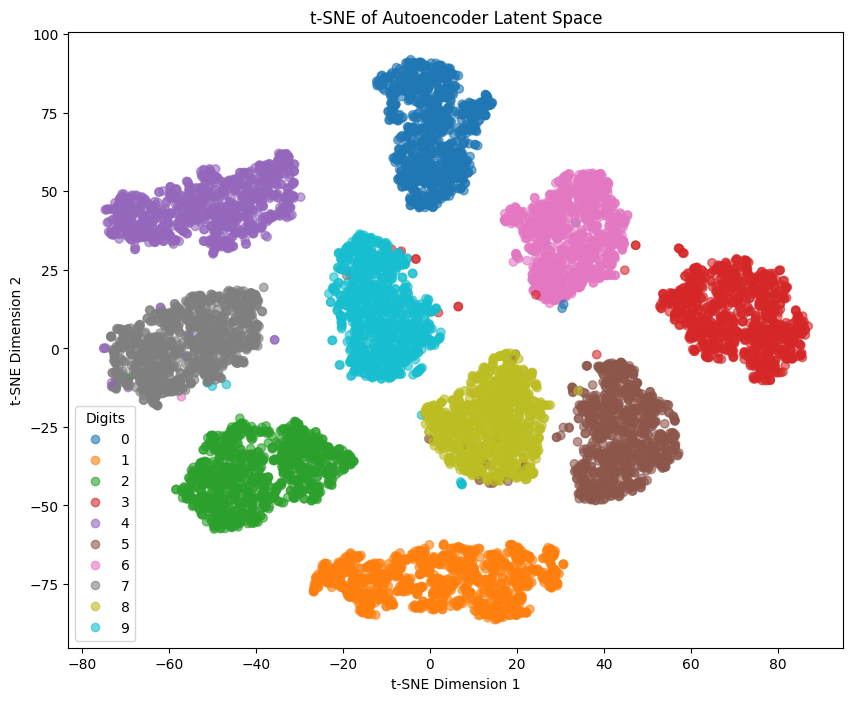

In [ ]:
from sklearn.manifold import TSNE

i = 0 
def get_latent_vectors(model, data_loader):
    model.eval()
    latent_vectors = []
    labels_list = []
    with torch.no_grad():
        for data in data_loader:
            inputs, targets, labels = data
            inputs = inputs.to(device)
            encoded = model.encoder(inputs)
            encoded = encoded.view(encoded.size(0), -1)
            latent_vectors.append(encoded.cpu().numpy())
            labels_list.append(labels.numpy())
    latent_vectors = np.concatenate(latent_vectors, axis=0)
    labels_list = np.concatenate(labels_list, axis=0)
    return latent_vectors, labels_list

test_loader_with_labels = DataLoader(torch.utils.data.TensorDataset(test_noisy, test_data, test_labels), batch_size=batch_size, shuffle=False)

latent_vectors, labels = get_latent_vectors(model, test_loader_with_labels)

tsne = TSNE(n_components=2, random_state=0, perplexity=30, n_iter=1000)
latent_tsne = tsne.fit_transform(latent_vectors)

plt.figure(figsize=(10,8))
scatter = plt.scatter(latent_tsne[:,0], latent_tsne[:,1], c=labels, cmap='tab10', alpha=0.6)
plt.legend(*scatter.legend_elements(), title="Digits")
plt.title('t-SNE of Autoencoder with RE Latent Space')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()


In [ ]:

sample_input = torch.randn(1, 3, 28, 28).to(device)  # Example input (batch size 1)
latent_output = model.encoder(sample_input)
print(f"Latent space shape: {latent_output.shape}")


Latent space shape: torch.Size([1, 16, 2, 2])


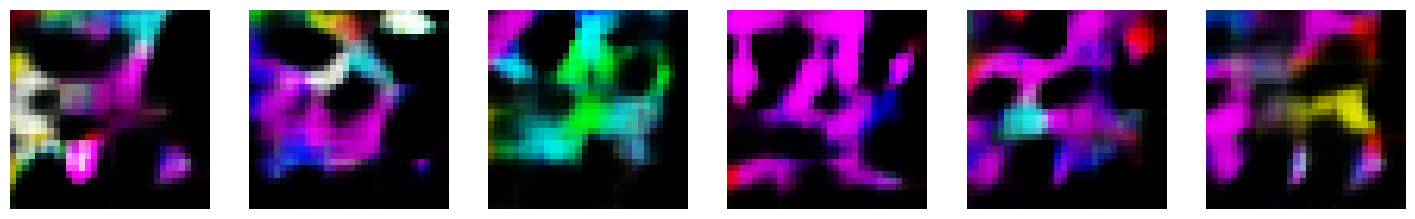

In [ ]:
def sample_and_decode(model, n_samples=5, device='cpu'):
    model.eval()
    latent_shape = (n_samples, 16, 2, 2)
    random_latent_vectors = torch.randn(latent_shape).to(device)
    with torch.no_grad():
        generated_images = model.decoder(random_latent_vectors).cpu()
    fig, axes = plt.subplots(1, n_samples, figsize=(n_samples * 3, 3))
    for i, ax in enumerate(axes):
        ax.imshow(generated_images[i].permute(1, 2, 0))
        ax.axis('off')
    plt.show()

sample_and_decode(model, n_samples=6, device=device)


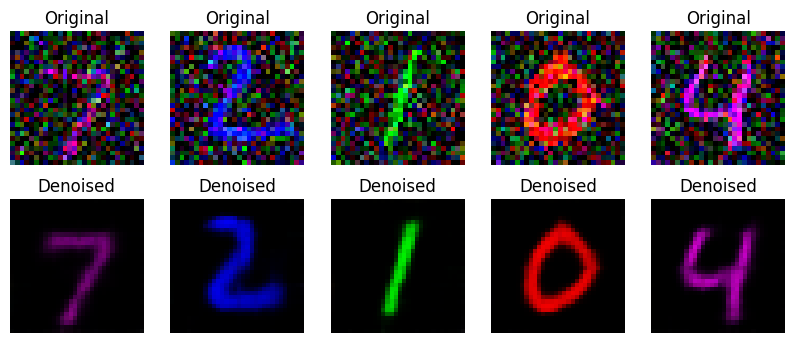

In [ ]:
def reconstruct_from_latent_space(model, data_loader, n_samples=5, device='cpu'):
    model.eval()
    data_iter = iter(data_loader)
    images, _ = next(data_iter)
    images = images[:n_samples].to(device)

    with torch.no_grad():
        latent_vectors = model.encoder(images)
        reconstructed_images = model.decoder(latent_vectors).cpu()

    fig, axes = plt.subplots(2, n_samples, figsize=(n_samples * 2, 4))

    for i in range(n_samples):
        axes[0, i].imshow(images[i].cpu().permute(1, 2, 0))
        axes[0, i].axis('off')
        axes[0, i].set_title('Original')

        axes[1, i].imshow(reconstructed_images[i].permute(1, 2, 0))
        axes[1, i].axis('off')
        axes[1, i].set_title('Denoised')

    plt.show()

reconstruct_from_latent_space(model, test_loader, n_samples=5, device=device)


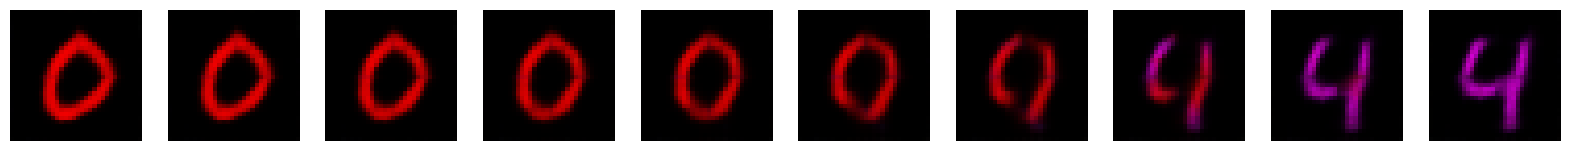

In [ ]:
import numpy as np

def interpolate_latent_space(model, data_loader, n_samples=5, device='cpu'):
    model.eval()
    data_iter = iter(data_loader)
    images, _ = next(data_iter)
    img1, img2 = images[3:5].to(device)

    with torch.no_grad():
        latent_vec1 = model.encoder(img1.unsqueeze(0))
        latent_vec2 = model.encoder(img2.unsqueeze(0))

    interpolated_images = []
    for alpha in np.linspace(0, 1, n_samples):
        latent_interpolated = latent_vec1 * (1 - alpha) + latent_vec2 * alpha
        with torch.no_grad():
            img = model.decoder(latent_interpolated).cpu()
        interpolated_images.append(img.squeeze(0))

    fig, axes = plt.subplots(1, n_samples, figsize=(n_samples * 2, 2))
    for i, ax in enumerate(axes):
        ax.imshow(interpolated_images[i].permute(1, 2, 0))
        ax.axis('off')
    plt.show()

interpolate_latent_space(model, test_loader, n_samples=10, device=device)


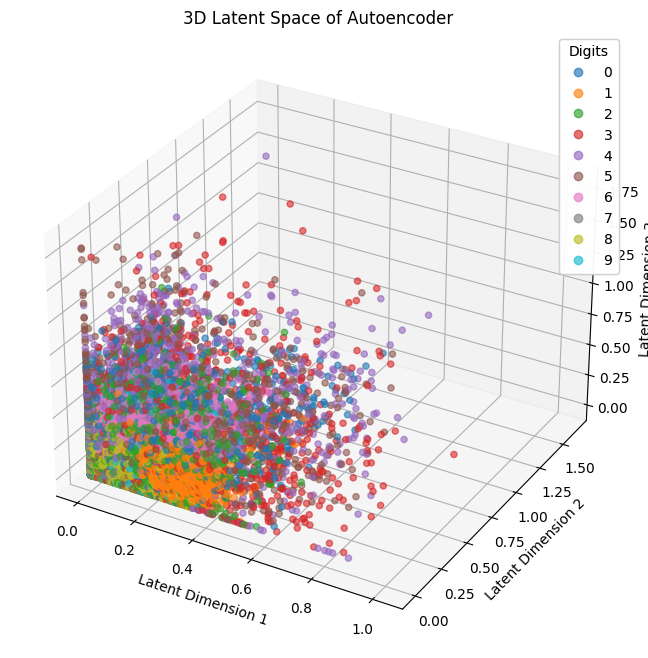

In [ ]:
model.eval()
latent_vectors = []

with torch.no_grad():
    for data in test_loader:
        inputs, _ = data
        inputs = inputs.to(device)
        encoded = model.encoder(inputs)
        encoded = encoded.view(encoded.size(0), -1)
        latent_vectors.append(encoded.cpu().numpy())

latent_vectors = np.concatenate(latent_vectors, axis=0)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(latent_vectors[:, 0], latent_vectors[:, 1], latent_vectors[:, 2],
                     c=labels, cmap='tab10', alpha=0.6)
legend = ax.legend(*scatter.legend_elements(), title="Digits")
ax.add_artist(legend)
ax.set_title('3D Latent Space of Autoencoder')
ax.set_xlabel('Latent Dimension 1')
ax.set_ylabel('Latent Dimension 2')
ax.set_zlabel('Latent Dimension 3')
plt.show()


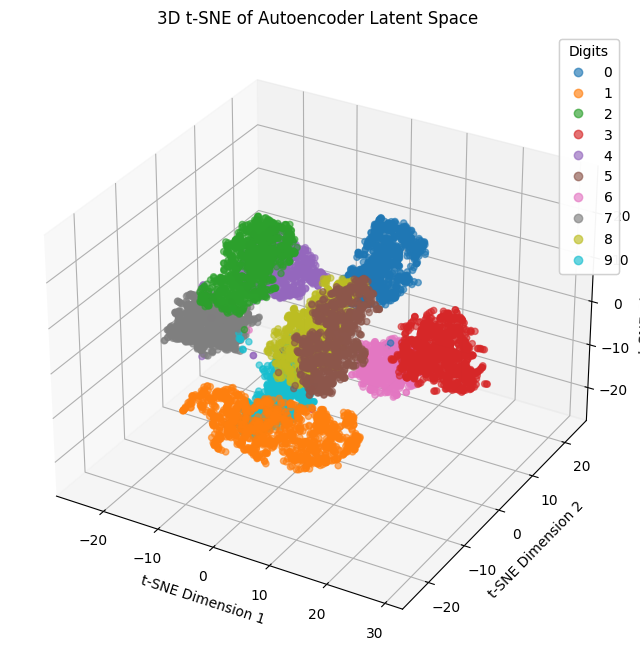

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

tsne_3d = TSNE(n_components=3, random_state=0, perplexity=30, n_iter=1000)
latent_tsne_3d = tsne_3d.fit_transform(latent_vectors)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(latent_tsne_3d[:,0], latent_tsne_3d[:,1], latent_tsne_3d[:,2],
                     c=labels, cmap='tab10', alpha=0.6)
legend = ax.legend(*scatter.legend_elements(), title="Digits")
ax.add_artist(legend)
ax.set_title('3D t-SNE of Autoencoder Latent Space')
ax.set_xlabel('t-SNE Dimension 1')
ax.set_ylabel('t-SNE Dimension 2')
ax.set_zlabel('t-SNE Dimension 3')
plt.show()


END